In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import json
import re

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
WOSfilename = "BIPV_ML_all.txt"
infilename = "BIPV_ML_kw.txt"
kwfilename = "keywords.json"
reldicfilename = "relative_dict.json"

In [14]:
df_paper = pd.DataFrame(columns=["author", "year", "journal", "title", "keywords", "doi"])

count = 0
with open(infilename, "r") as infile:
    line = " "        
    while line != "EF":
        line = infile.readline()
        # author
        if line[:3] == "AU ":
            line_AU = line
            author = line_AU[3:].rstrip("\n")
        
        # title
        if line[:3] == "TI ":
            line_TI = line
            title = line_TI[3:].rstrip("\n")
        
        # keywords
        if line[:3] == "DE ":
            line_DE = line
            keywords = line_DE[3:].rstrip("\n").split("; ")
            
        # year
        if line[:3] == "PY ":
            line_PY = line
            year = int(line_PY[3:].rstrip("\n"))
            
        # journal
        if line[:3] == "JI ":
            line_JI = line
            journal = line_JI[3:].rstrip("\n")
        
        # DOI
        if line[:3] == "DI ":
            line_DI = line
            doi = line_DI[3:].rstrip("\n")
        
            count += 1
            df_tmp = pd.DataFrame({"author": author, 
                                   "year": year, 
                                   "journal": journal, 
                                   "title": title, 
                                   "keywords": [keywords], 
                                   "doi": doi
                                   })
            df_paper = pd.concat([df_paper, df_tmp], axis=0)

df_paper.to_csv("BIPV_ML_kw_summary.csv", index=False)        

In [31]:
def is_bipv(x):
    if "bipv" in x:
        return 1
    else:
        return 0

def is_shadow(x):
    if "shadow" in x:
        return 1
    else:
        return 0    

def is_ml(x):
    if "machine learning" in x:
        return 1
    else:
        return 0    

def is_dl(x):
    if "deep learning" in x:
        return 1
    else:
        return 0    
    
def is_nn(x):
    if "neural network" in x:
        return 1
    else:
        return 0    
    
def is_cnn(x):
    if "cnn" in x:
        return 1
    else:
        return 0    

def is_rnn(x):
    if "rnn" in x:
        return 1
    else:
        return 0        

In [32]:
df_paper["is_bipv"] = df_paper["keywords"].apply(is_bipv)
df_paper["is_shadow"] = df_paper["keywords"].apply(is_shadow)
df_paper["is_ml"] = df_paper["keywords"].apply(is_ml)
df_paper["is_dl"] = df_paper["keywords"].apply(is_dl)
df_paper["is_nn"] = df_paper["keywords"].apply(is_nn)
df_paper["is_cnn"] = df_paper["keywords"].apply(is_cnn)
df_paper["is_rnn"] = df_paper["keywords"].apply(is_rnn)

In [33]:
df_paper.head()

,author,year,journal,title,keywords,doi,is_bipv,is_shadow,is_ml,is_dl,is_nn,is_cnn,is_rnn
0,Smestad G.P.,2020,Sci. Rep.,Modelling photovoltaic soiling losses through ...,"[system, correlation, photovoltaic, cell, none...",10.1038/s41598-019-56868-z,0,0,0,0,0,0,0
0,Hamdi H.,2020,Prot. Cont. Mod. Power Sys.,A sliding-neural network control of induction-...,"[generator, fuzzy, power, characteristization,...",10.1186/s41601-019-0145-1,0,0,1,1,1,0,0
0,Reyna-Fabian M.E.,2020,Sci. Rep.,First comprehensive TSC1/TSC2 mutational analy...,"[model, correlation, diagnosis, algorithm, opt...",10.1038/s41598-020-62759-5,0,0,0,0,0,0,0
0,Hussain A.,2020,Int J Electr Power Energy Syst,A novel sensor-less current technique for phot...,"[transformer, method, temperature, converter, ...",10.1016/j.ijepes.2020.106165,0,0,0,0,0,0,0
0,Alotaibi S.,2020,Energy Rep.,Solar-assisted steam power plant retrofitted w...,"[steam power plants, power, optimization, gene...",10.1016/j.egyr.2019.12.019,0,0,0,0,0,0,0


In [34]:
df_paper.to_csv("BIPV_ML_kw_summary.csv", index=False)        

In [165]:
df_tmp = df_paper.groupby("journal").count().reset_index()
print(df_tmp[df_tmp["author"]>=30].shape[0])
df_tmp = df_tmp[df_tmp["author"]>=30].sort_values("author", ascending=False)
df_tmp.head()

44


,journal,author,year,title,keywords,doi,is_bipv,is_shadow,is_ml,is_dl,is_nn,is_cnn,is_rnn
1646,Renew. Energy,269,269,269,269,269,269,269,269,269,269,269,269
296,Energies,258,258,258,258,258,258,258,258,258,258,258,258
97,Appl. Energy,245,245,245,245,245,245,245,245,245,245,245,245
297,Energy,228,228,228,228,228,228,228,228,228,228,228,228
310,Energy Procedia,205,205,205,205,205,205,205,205,205,205,205,205


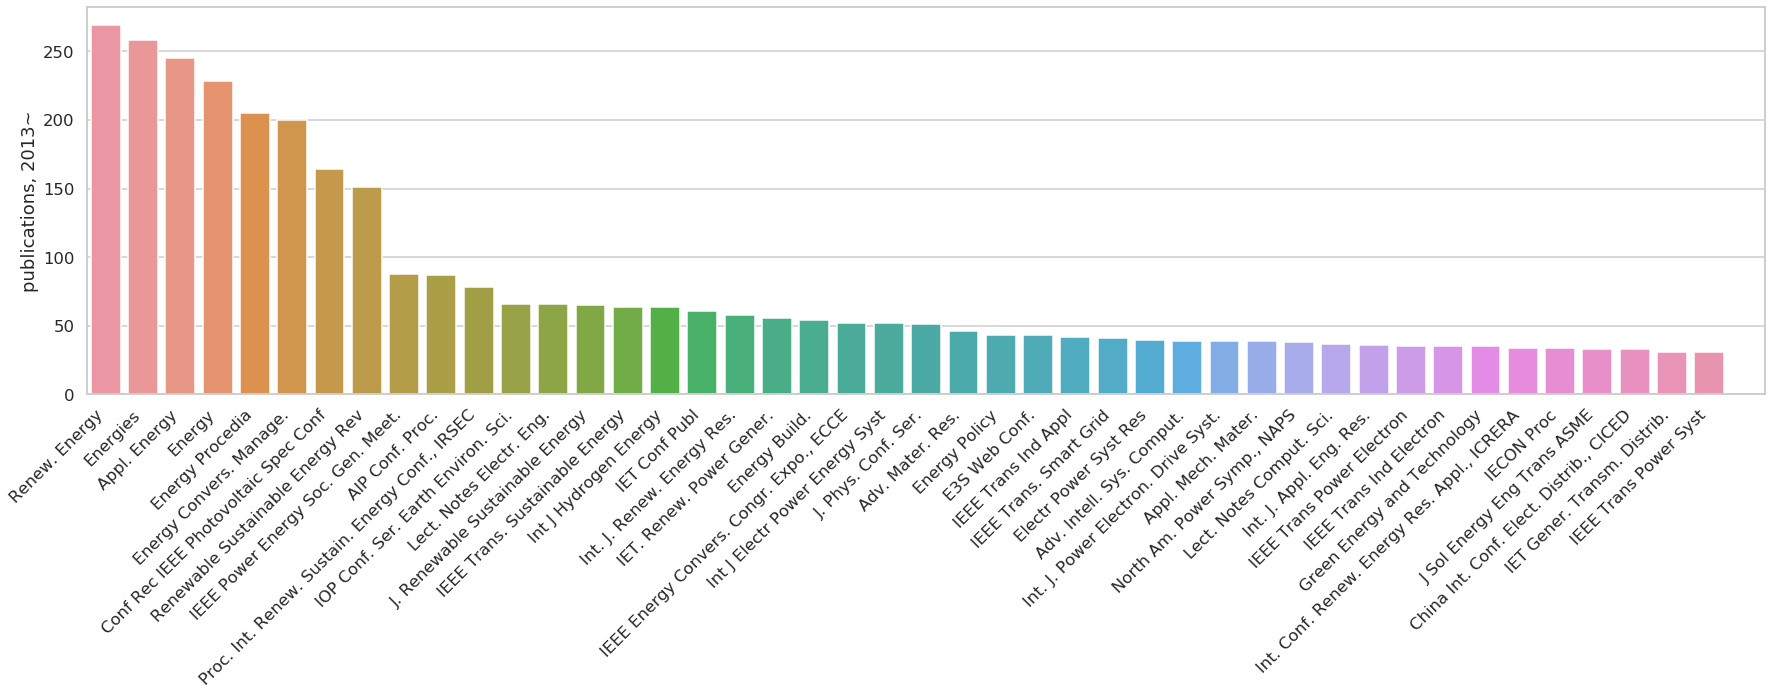

In [107]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot("journal", "author", data=df_tmp, ax=ax)
ax.set_xlim(-0.5, df_tmp.shape[0]+0.5)
ax.set_ylabel("publications, 2013~")
ax.set_xlabel("")
ax.set_xticklabels(df_tmp["journal"], rotation=45, horizontalalignment='right')
fig.tight_layout()
plt.savefig("fig_journal_over30.png")

In [97]:
grouped = df_paper.groupby("journal")
df_j_sum = grouped.sum()

In [108]:
j30 = df_tmp['journal'].tolist()
df_j30 = df_j_sum.loc[j30].reset_index()

In [167]:
df_j30

,journal,is_bipv,is_shadow,is_ml,is_dl,is_nn,is_cnn,is_rnn
0,Renew. Energy,8,10,93,77,77,0,1
1,Energies,5,9,101,77,76,1,2
2,Appl. Energy,14,12,87,75,75,2,0
3,Energy,5,10,77,70,70,1,1
4,Energy Procedia,10,8,44,35,35,0,0
5,Energy Convers. Manage.,5,4,59,52,52,2,0
6,Conf Rec IEEE Photovoltaic Spec Conf,2,15,26,21,21,0,0
7,Renewable Sustainable Energy Rev,6,8,51,42,41,0,0
8,IEEE Power Energy Soc. Gen. Meet.,0,2,22,15,15,2,0
9,AIP Conf. Proc.,0,4,18,14,14,0,0


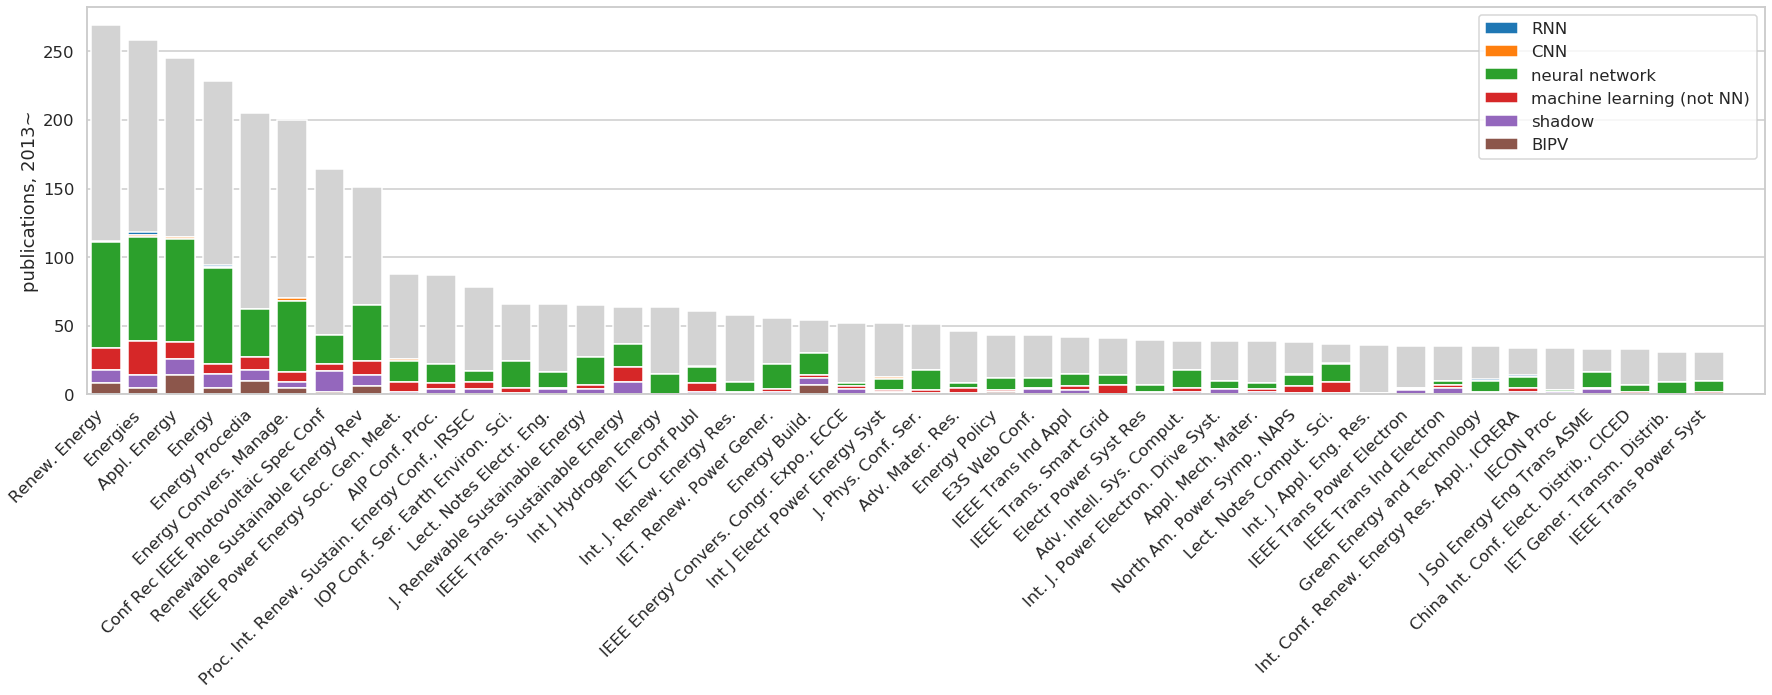

In [147]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot("journal", "author", data=df_tmp, ax=ax, color="lightgray")
ax.bar(df_j30["journal"], df_j30["is_rnn"], bottom=df_j30["is_cnn"]+df_j30["is_ml"]+df_j30["is_shadow"]+df_j30["is_bipv"], zorder=2, label="RNN")
ax.bar(df_j30["journal"], df_j30["is_cnn"], bottom=df_j30["is_ml"]+df_j30["is_shadow"]+df_j30["is_bipv"], zorder=2, label="CNN")
ax.bar(df_j30["journal"], df_j30["is_nn"], bottom=df_j30["is_ml"]-df_j30["is_nn"]+df_j30["is_shadow"]+df_j30["is_bipv"], zorder=2, label="neural network")
ax.bar(df_j30["journal"], df_j30["is_ml"]-df_j30["is_nn"], bottom=df_j30["is_shadow"]+df_j30["is_bipv"], zorder=2, label="machine learning (not NN)")
ax.bar(df_j30["journal"], df_j30["is_shadow"], bottom=df_j30["is_bipv"], zorder=2, label="shadow")
ax.bar(df_j30["journal"], df_j30["is_bipv"], zorder=2, label="BIPV")
ax.set_xlim(-0.5, df_tmp.shape[0]+0.5)
ax.set_ylabel("publications, 2013~")
ax.set_xlabel("")
ax.set_xticklabels(df_tmp["journal"], rotation=45, horizontalalignment='right')
ax.legend()
fig.tight_layout()
plt.savefig("fig_journal_over30_keywords.png")

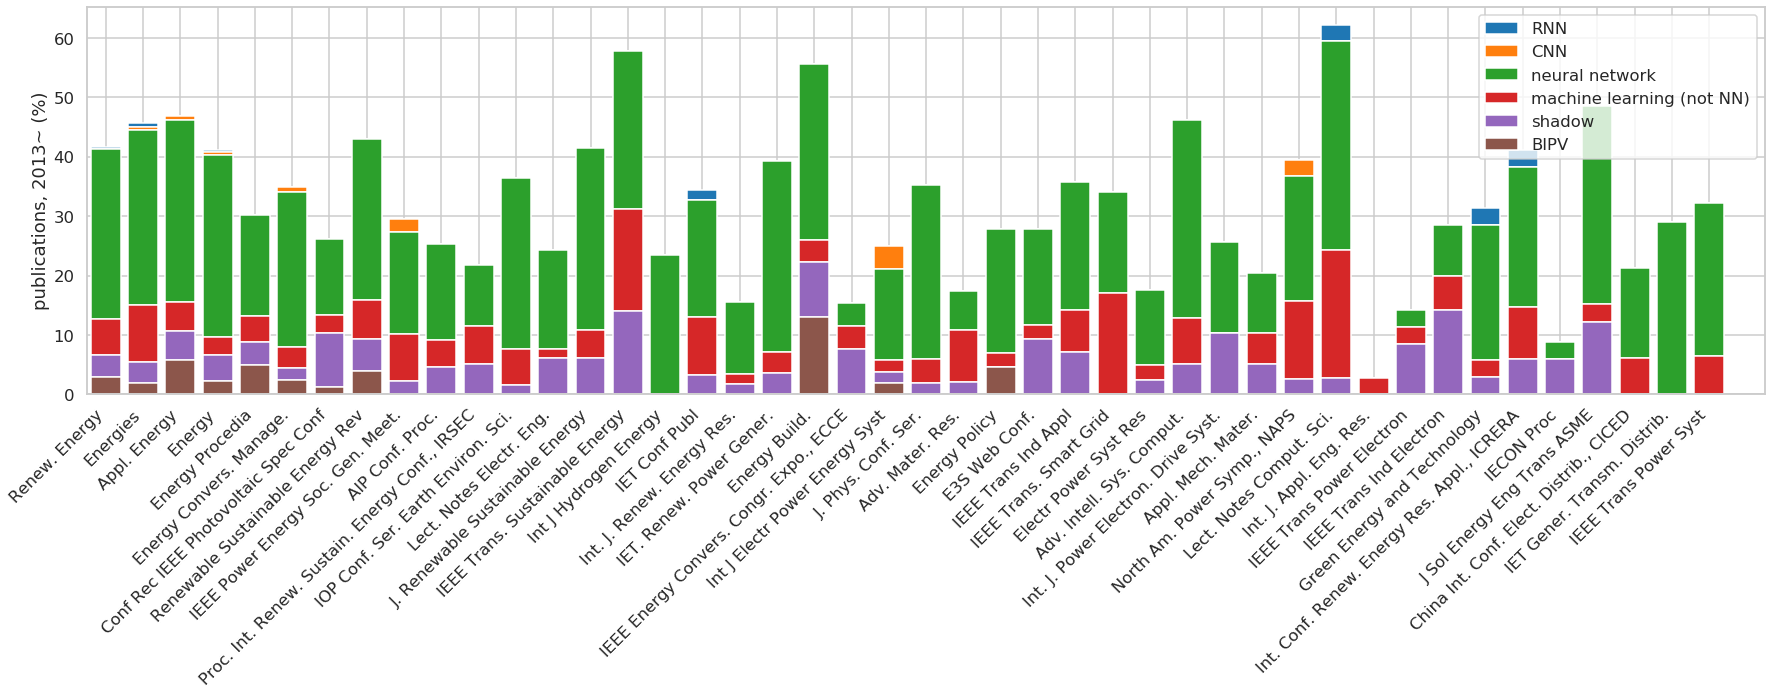

In [148]:
df_tmp.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(figsize=(25, 10))
# sns.barplot("journal", [100]*df_tmp.shape[0], data=df_tmp, ax=ax, color="lightgray")

ax.bar(df_j30["journal"], df_j30["is_rnn"]/df_tmp["author"]*100, bottom=(df_j30["is_cnn"]+df_j30["is_ml"]+df_j30["is_shadow"]+df_j30["is_bipv"])/df_tmp["author"]*100, zorder=2, label="RNN")
ax.bar(df_j30["journal"], df_j30["is_cnn"]/df_tmp["author"]*100, bottom=(df_j30["is_ml"]+df_j30["is_shadow"]+df_j30["is_bipv"])/df_tmp["author"]*100, zorder=2, label="CNN")
ax.bar(df_j30["journal"], df_j30["is_nn"]/df_tmp["author"]*100, bottom=(df_j30["is_ml"]-df_j30["is_nn"]+df_j30["is_shadow"]+df_j30["is_bipv"])/df_tmp["author"]*100, zorder=2, label="neural network")
ax.bar(df_j30["journal"], (df_j30["is_ml"]-df_j30["is_nn"])/df_tmp["author"]*100, bottom=(df_j30["is_shadow"]+df_j30["is_bipv"])/df_tmp["author"]*100, zorder=2, label="machine learning (not NN)")
ax.bar(df_j30["journal"], df_j30["is_shadow"]/df_tmp["author"]*100, bottom=df_j30["is_bipv"]/df_tmp["author"]*100, zorder=2, label="shadow")
ax.bar(df_j30["journal"], df_j30["is_bipv"]/df_tmp["author"]*100, zorder=2, label="BIPV")

ax.set_xlim(-0.5, df_tmp.shape[0]+0.5)
ax.set_ylabel("publications, 2013~ (%)")
ax.set_xlabel("")
ax.set_xticklabels(df_tmp["journal"], rotation=45, horizontalalignment='right')
ax.legend(loc='upper right')
fig.tight_layout()
plt.savefig("fig_journal_over30_keywords_percent.png")

In [154]:
df_paper.reset_index(drop=True, inplace=True)
df_eb = df_paper.loc[df_paper["journal"]=="Energy Build."]
df_bipv = df_paper.loc[df_paper["is_bipv"]==1]
df_shadow = df_paper.loc[df_paper["is_shadow"]==1]

In [163]:
df_bipv_shadow = df_paper.loc[list(set(df_bipv.index) & set(df_shadow.index))]
print(df_bipv_shadow.shape[0])

pd.set_option('display.max_colwidth', 80)
display(df_bipv_shadow)
df_bipv_shadow[["author", "year", "journal", "title", "keywords"]]

14


,author,year,journal,title,keywords,doi,is_bipv,is_shadow,is_ml,is_dl,is_nn,is_cnn,is_rnn
1473,Araki K.,2019,Conf Rec IEEE Photovoltaic Spec Conf,Curve Correction of the Energy Yield by Flexible Photovoltaics for VIPV and ...,"[database, method, characteristization, vipv, performance, building, distrib...",10.1109/PVSC40753.2019.8980729,1,1,0,0,0,0,0
7043,Salem T.,2015,Procedia Eng.,Analysis of Building-integrated Photovoltaic Systems: A Case Study of Commer...,"[roof, temperature, converter, optimization, genetic algorithm, performance,...",10.1016/j.proeng.2015.08.473,1,1,0,0,0,0,0
4581,Gui N.,2017,"IEEE Conf. Energy Internet Energy Syst. Integr., EI2 - Proc.",An integrated design platform for BIPV system considering building information,"[power, optimization, genetic algorithm, building, shadow and radiation anal...",10.1109/EI2.2017.8245659,1,1,1,1,1,0,0
870,Al-Janahi S.A.,2019,"Int. Conf. Smart Grid Renew. Energy, SGRE - Proc.",Optimal Configuration for Building Integrated Photovoltaics System to Mitiga...,"[roof, characteristization, building, photovoltaic, bipv, module, shading, s...",10.1109/SGRE46976.2019.9020981,1,1,0,0,0,0,0
3368,Vulkan A.,2018,Energy Build.,Modeling the potential for PV installation in residential buildings in dense...,"[roof, database, method, building, distribution, r open-source code, photovo...",10.1016/j.enbuild.2018.03.052,1,1,0,0,0,0,0
460,Quintana S.,2020,Intelligent Build. Int.,A preliminary techno-economic study of a building integrated photovoltaic (B...,"[optimization, performance, building, battery, techno-economic analysis, pho...",10.1080/17508975.2020.1765134,1,1,1,0,0,0,0
1488,Araki K.,2019,Conf Rec IEEE Photovoltaic Spec Conf,Rough and Straightforward Estimation of the Mismatching Loss by Partial Shad...,"[roof, method, resource, power, output, mean bias error, vipv, building, pho...",10.1109/PVSC40753.2019.8981199,1,1,0,0,0,0,0
7603,Saber E.M.,2014,Energy,PV (photovoltaics) performance evaluation and simulation-based energy yield ...,"[roof, pv external sunshade, tropics, building, bipv, deep learning, simulat...",10.1016/j.energy.2014.04.115,1,1,1,1,1,0,0
3604,Assoa Y.B.,2018,Appl. Energy,Dynamic prediction of a building integrated photovoltaic system thermal beha...,"[roof, temperature, optimization, noct, genetic algorithm, mean absolute err...",10.1016/j.apenergy.2018.01.078,1,1,0,0,0,0,0
1880,Walker L.,2019,Appl. Energy,"High-resolution, parametric BIPV and electrical systems modeling and design","[roof, method, high-resolution, building, bipv, loss, high-resolution modeli...",10.1016/j.apenergy.2018.12.088,1,1,1,1,1,0,0


,author,year,journal,title,keywords
1473,Araki K.,2019,Conf Rec IEEE Photovoltaic Spec Conf,Curve Correction of the Energy Yield by Flexible Photovoltaics for VIPV and ...,"[database, method, characteristization, vipv, performance, building, distrib..."
7043,Salem T.,2015,Procedia Eng.,Analysis of Building-integrated Photovoltaic Systems: A Case Study of Commer...,"[roof, temperature, converter, optimization, genetic algorithm, performance,..."
4581,Gui N.,2017,"IEEE Conf. Energy Internet Energy Syst. Integr., EI2 - Proc.",An integrated design platform for BIPV system considering building information,"[power, optimization, genetic algorithm, building, shadow and radiation anal..."
870,Al-Janahi S.A.,2019,"Int. Conf. Smart Grid Renew. Energy, SGRE - Proc.",Optimal Configuration for Building Integrated Photovoltaics System to Mitiga...,"[roof, characteristization, building, photovoltaic, bipv, module, shading, s..."
3368,Vulkan A.,2018,Energy Build.,Modeling the potential for PV installation in residential buildings in dense...,"[roof, database, method, building, distribution, r open-source code, photovo..."
460,Quintana S.,2020,Intelligent Build. Int.,A preliminary techno-economic study of a building integrated photovoltaic (B...,"[optimization, performance, building, battery, techno-economic analysis, pho..."
1488,Araki K.,2019,Conf Rec IEEE Photovoltaic Spec Conf,Rough and Straightforward Estimation of the Mismatching Loss by Partial Shad...,"[roof, method, resource, power, output, mean bias error, vipv, building, pho..."
7603,Saber E.M.,2014,Energy,PV (photovoltaics) performance evaluation and simulation-based energy yield ...,"[roof, pv external sunshade, tropics, building, bipv, deep learning, simulat..."
3604,Assoa Y.B.,2018,Appl. Energy,Dynamic prediction of a building integrated photovoltaic system thermal beha...,"[roof, temperature, optimization, noct, genetic algorithm, mean absolute err..."
1880,Walker L.,2019,Appl. Energy,"High-resolution, parametric BIPV and electrical systems modeling and design","[roof, method, high-resolution, building, bipv, loss, high-resolution modeli..."
